# Data Set Information:
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,6

In [4]:
from google.colab import files
uploaded = files.upload()

Saving propensity data.csv to propensity data.csv


In [47]:
df = pd.read_csv('propensity data.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [48]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [0]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

## Dataset is clean and already processed to some extent with the attribute information:
*  Dataset has total 41188 Rows and 21 Columns. 
*  5 integer with numericvariables, 11 object type with numeric /decimal variables and 5 float/categorical variables.

## Input variables:
### Bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
### 4 - education (categorical:
'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')

### Related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone') 
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
### Other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
### Social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric) 
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

### Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

### Data and information source-

*S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014* 
### Numerical Variable:
*  Age
* Balance
* Day
* Duration
* Campaign
* Pdays
* Previous



In [0]:
pd.set_option('display.max_columns', 100)  
print(df.describe()) # high level statistics
print('*'*60)
print(df.info())

               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198    

In [0]:
df.shape

(41188, 21)

## statistics object/categorical and float/decimal variables

In [0]:
print(df.describe(include=[np.object]))
print('*'*60)
print(df.describe(include = [np.float]))


           job  marital          education default housing   loan   contact  \
count    41188    41188              41188   41188   41188  41188     41188   
unique      12        4                  8       3       3      3         2   
top     admin.  married  university.degree      no     yes     no  cellular   
freq     10422    24928              12168   32588   21576  33950     26144   

        month day_of_week     poutcome      y  
count   41188       41188        41188  41188  
unique     10           5            3      2  
top       may         thu  nonexistent     no  
freq    13769        8623        35563  36548  
************************************************************
       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911
std        1.570960        0.578840       4.628198      1.734447  

## Data visualisation and exploratory data analysis

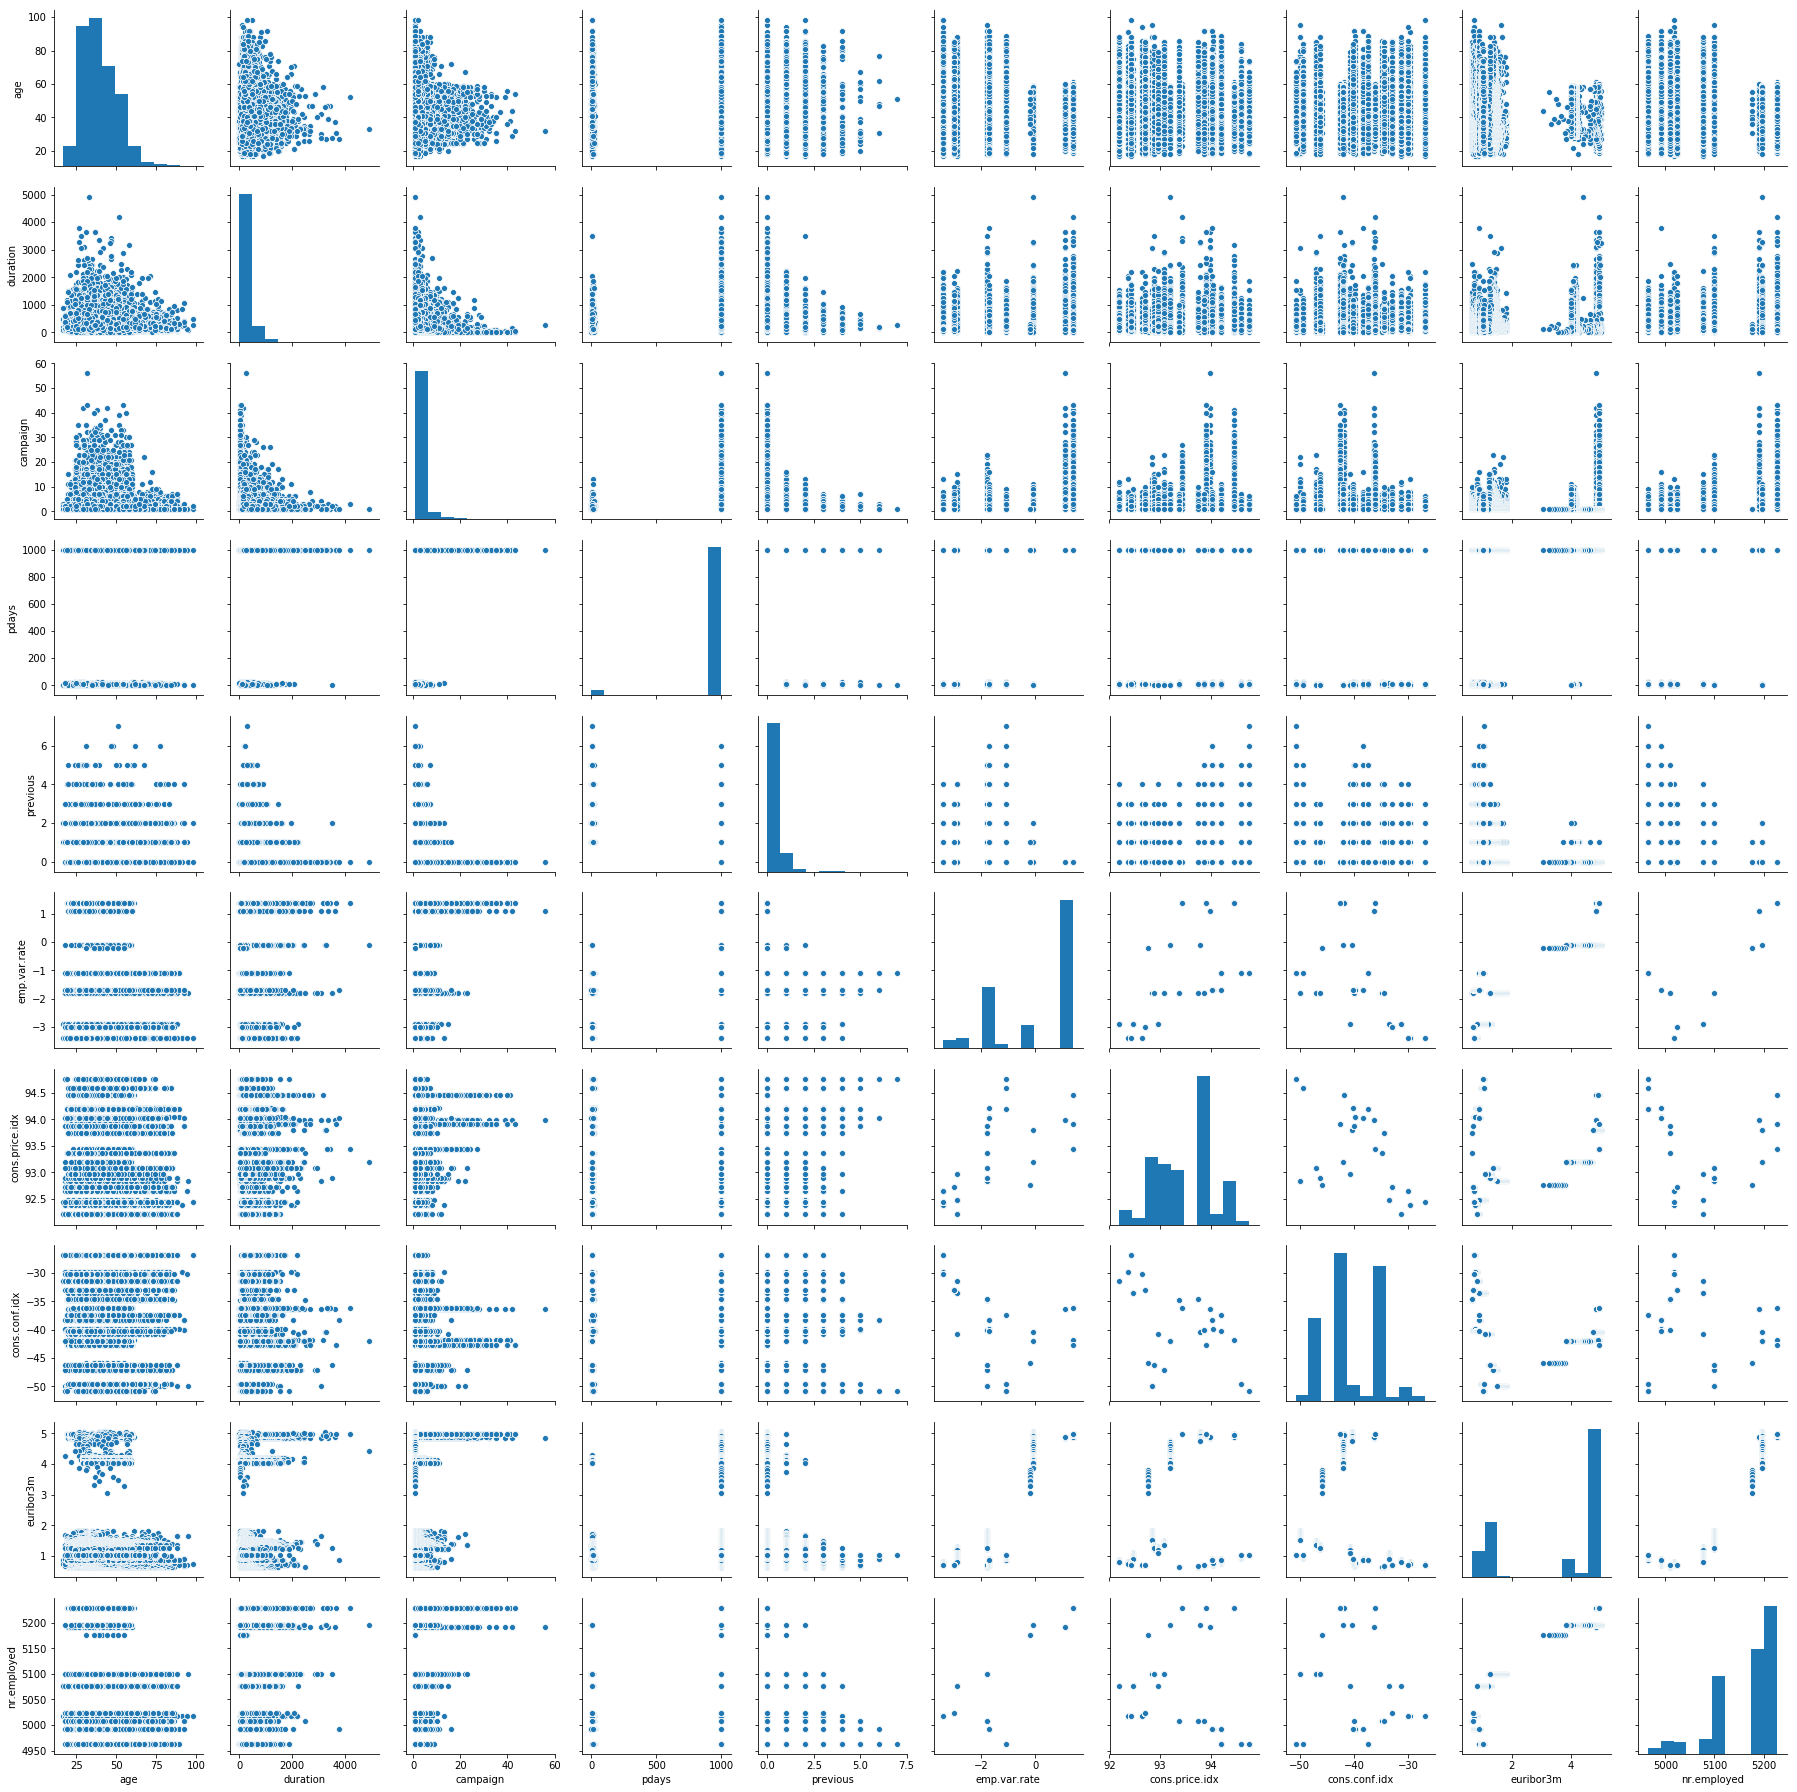

In [6]:
import seaborn as sns
sns.pairplot(df)

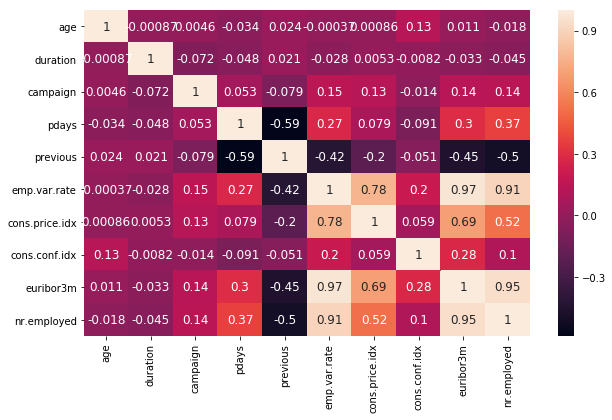

In [7]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, 
            yticklabels=corr.columns.values, 
            annot = True, annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(10,6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

As per the pairplot and heatmap, the Data is non-linear, asymmetric Hence selection of features will not depend upon correlation factor. Also not a single feature is correlated completely with class, hence requires combinantion of features.
### Feature Selection techniques:
Data is classification type. Hence Decision tree technique and RFE can be used for feature selection. Best possible technique will be which gives extracts columns who provide better accuracy. 
## Categorical Variable :

In [0]:
print("Job")
print('*'*15)
df.job.value_counts()


Job
***************


admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [0]:
print("Marital")
print('*'*15)
df.marital.value_counts()

Marital
***************


married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [0]:
print("Education")
print('*'*15)
df.education.value_counts()

Education
***************


university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [0]:
print("Default")
print('*'*15)
df.default.value_counts()

Default
***************


no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [0]:
print("Housing")
print('*'*15)
df.housing.value_counts()

Housing
***************


yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [0]:
print("Loan")
print('*'*15)
df.loan.value_counts()

Loan
***************


no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [0]:
print("Outcome")
print('*'*15)
df.poutcome.value_counts()

Outcome
***************


nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [0]:
print("Month")
print('*'*15)
df.month.value_counts()

Month
***************


may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [0]:
print("Week")
print('*'*15)
df.day_of_week.value_counts()

Week
***************


thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [0]:
print("y")
print('*'*15)
df.y.value_counts()

y
***************


no     36548
yes     4640
Name: y, dtype: int64

In [0]:
print("Contact")
print('*'*15)
df.contact.value_counts()

Contact
***************


cellular     26144
telephone    15044
Name: contact, dtype: int64

In [0]:
print("Housing")
print('*'*15)
df.housing.value_counts()

Housing
***************


yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

### Visualisation Categorical Variable :


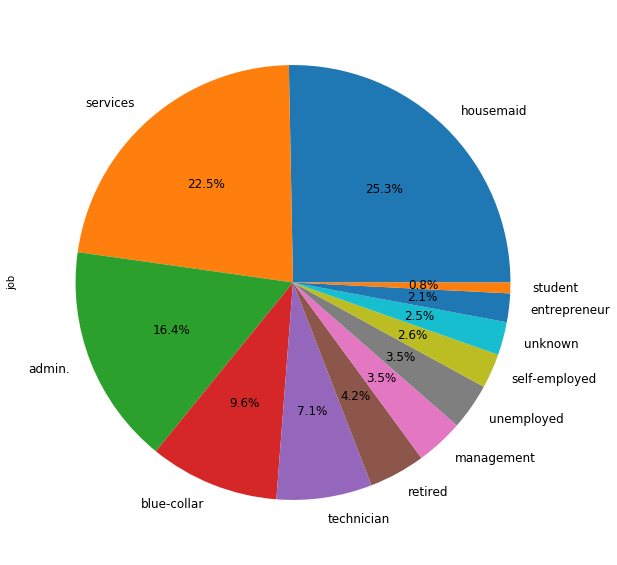

In [0]:
fig = plt.figure(figsize=(15,10)) # create a pie plot to see the type of professionals can be targetted
ax = (df['job'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['housemaid', 'services', 'admin.', 'blue-collar', 'technician', 
                                      'retired', 'management', 'unemployed', 
                                      'self-employed', 'unknown', 'entrepreneur', 'student' ],
         fontsize=12)                                                                           
plt.show()

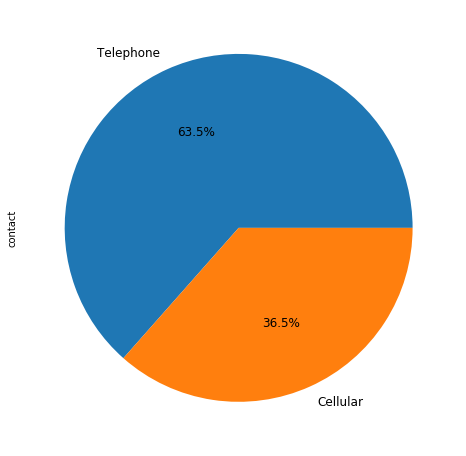

In [0]:
fig = plt.figure(figsize=(12, 8)) # check the education level
ax = (df['contact'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Telephone','Cellular'],
         fontsize=12)                                                                           
plt.show()


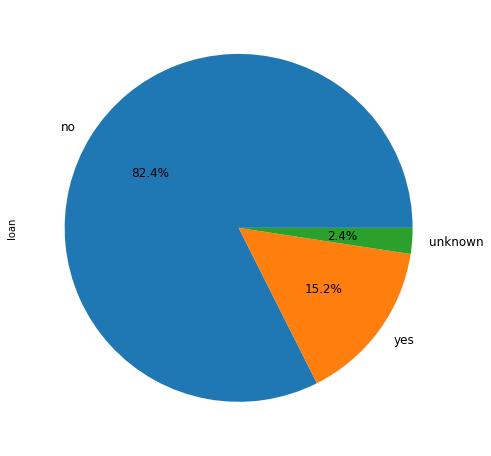

In [0]:
fig = plt.figure(figsize=(12, 8)) # check the education level
ax = (df['loan'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['no', 'yes', 'unknown'],
         fontsize=12)                                                                           
plt.show()


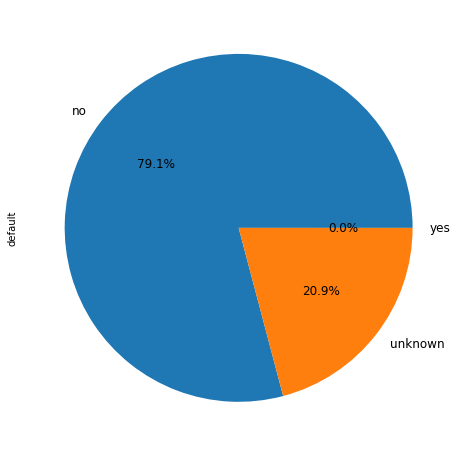

In [0]:
fig = plt.figure(figsize=(12, 8)) # check the education level
ax = (df['default'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['no', 'unknown', 'yes'],
         fontsize=12)                                                                           
plt.show()

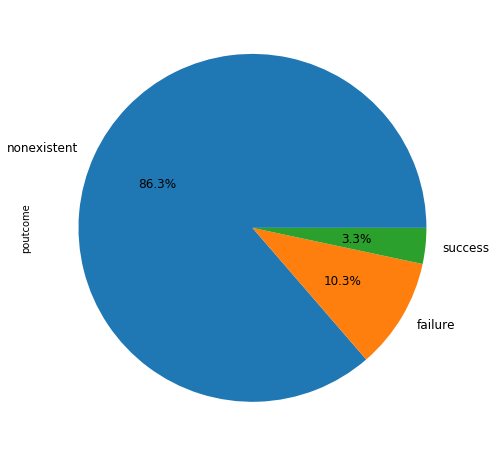

In [0]:
fig = plt.figure(figsize=(12, 8)) # check the education level
ax = (df['poutcome'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['nonexistent', 'failure', 'success'],
         fontsize=12)                                                                           
plt.show()

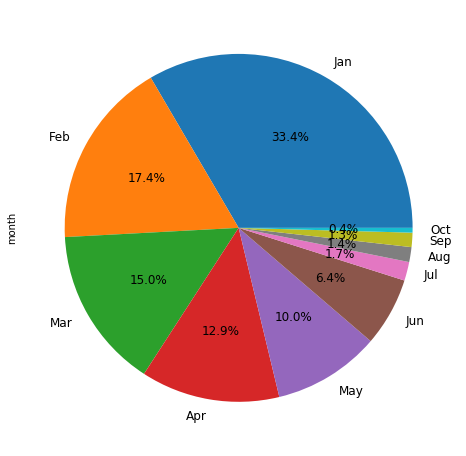

In [0]:
fig = plt.figure(figsize=(12, 8)) # check the education level
ax = (df['month'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul',
                                      'Aug','Sep','Oct','Nov','Dec'],
         fontsize=12)                                                                           
plt.show()

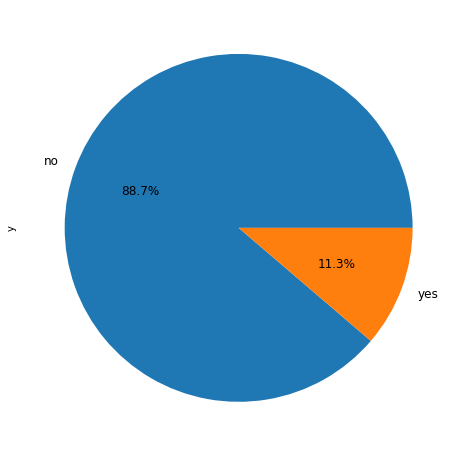

In [0]:
fig = plt.figure(figsize=(12, 8)) # check the education level
ax = (df['y'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['no', 'yes'],
         fontsize=12)                                                                           
plt.show()

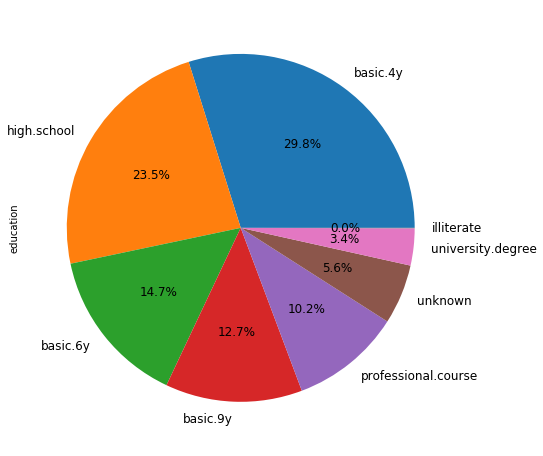

In [0]:
fig = plt.figure(figsize=(12, 8)) # check the education level
ax = (df['education'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['basic.4y', 'high.school', 'basic.6y', 'basic.9y', 
                                      'professional.course', 'unknown', 'university.degree', 'illiterate'],
         fontsize=12)                                                                           
plt.show()

### List of normalised relative frequency of the target class per category.
Normalised distribution of each class per feature and plotted difference between positive and negative frequencies. Positive values imply this category favors clients interest and negative values for not interested.

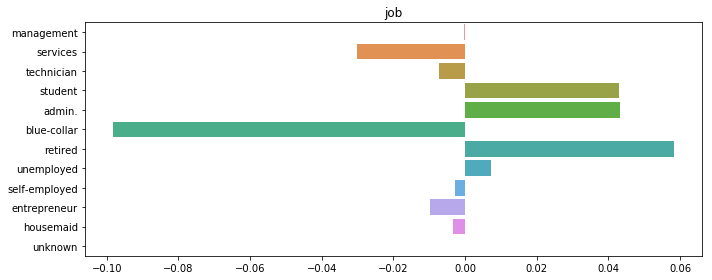

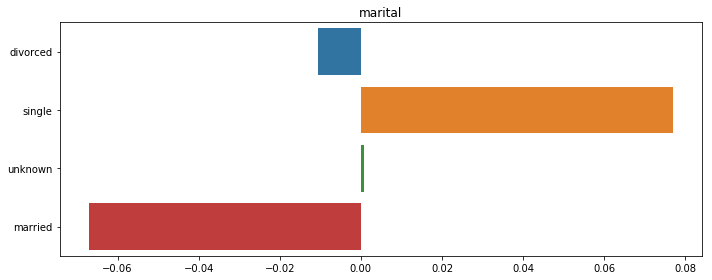

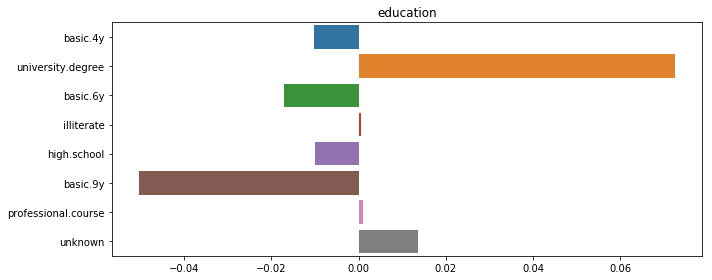

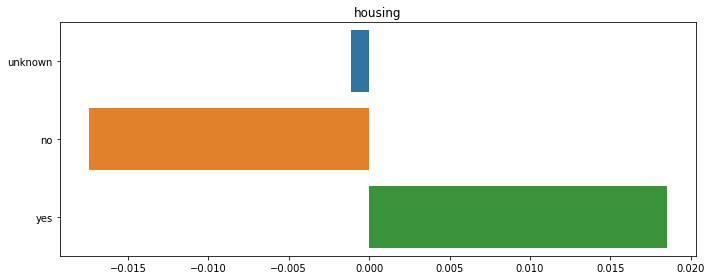

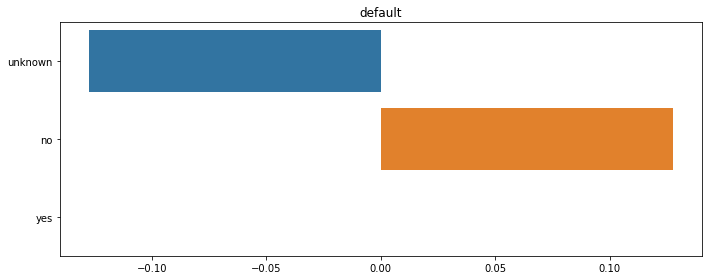

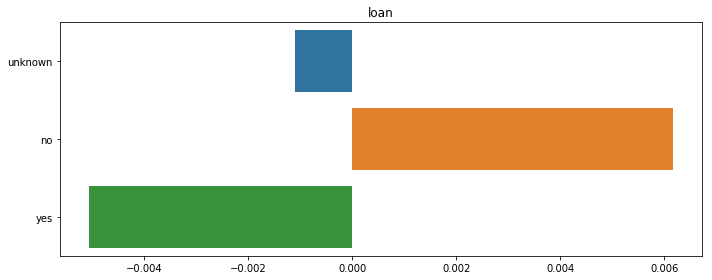

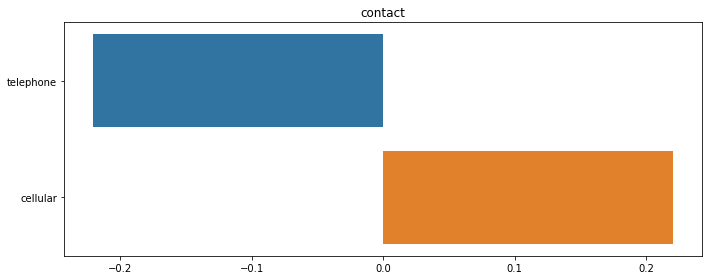

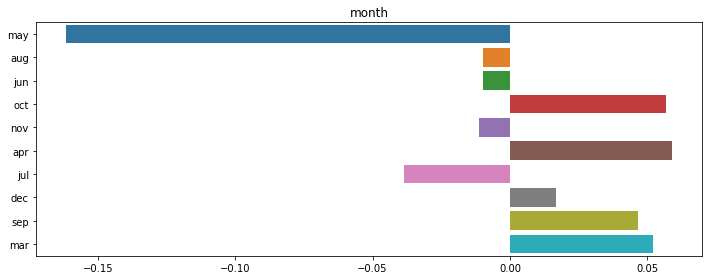

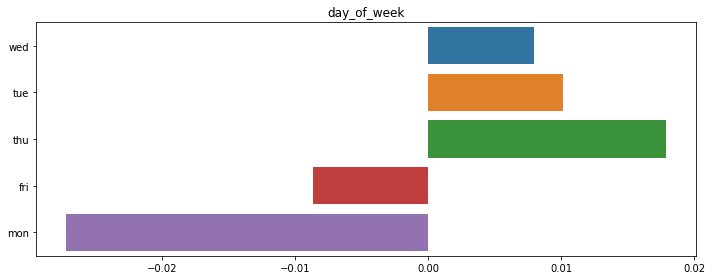

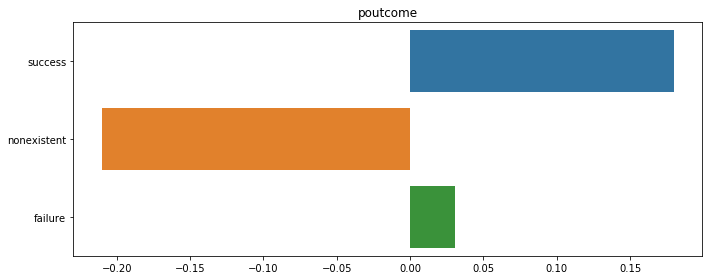

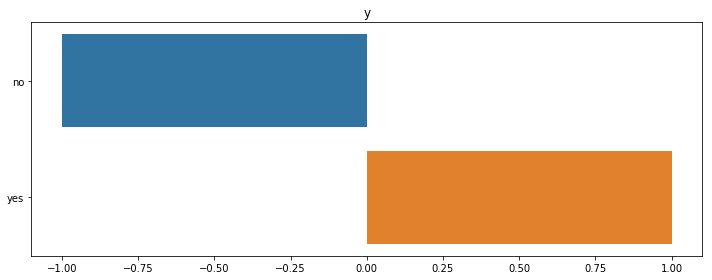

In [50]:
categorcial_variables = ['job', 'marital', 'education', 'housing','default', 
                         'loan', 'contact', 'month', 'day_of_week', 'poutcome','y']
for col in categorcial_variables:
    plt.figure(figsize=(10,4))
    #Returns counts of unique values for each outcome for each feature.
    pos_counts = df.loc[df.y.values == 'yes', col].value_counts() 
    neg_counts = df.loc[df.y.values == 'no', col].value_counts()
    
    all_counts = list(set(list(pos_counts.index) + list(neg_counts.index)))
    
    #Counts of how often each outcome was recorded.
    freq_pos = (df.y.values == 'yes').sum()
    freq_neg = (df.y.values == 'no').sum()
    
    pos_counts = pos_counts.to_dict()
    neg_counts = neg_counts.to_dict()
    
    all_index = list(all_counts)
    all_counts = [pos_counts.get(k, 0) / freq_pos - neg_counts.get(k, 0) / freq_neg for k in all_counts]

    sns.barplot(all_counts, all_index)
    plt.title(col)
    plt.tight_layout()   

### Variables with unknown values are : 
- 'education', 'job', 'housing', 'loan', 'deafult', and 'marital'. 
- 'education (1731)', 'job (330)', 'housing (990)', and 'loan (990)'' are significant. 
- unknown for 'marital (80)' is very low. 
- The unknown for 'default' variable are considered to be recorded as unknown. It may be possible that customer is not willing to disclose this information to the banking representative. Hence the unknown value in 'default' is actually a separate value.

We start with creating new variables for the unknown values in 'education', 'job', 'housing' and 'loan'. We do this to see if the values are missing at random or is there a pattern in the missing values.

In [0]:
sig_cat_var = ['education','job','housing','loan']
for var in sig_cat_var:
    df[var + '_un'] = (df[var] == 'unknown').astype(int)

### Imputation:
Now, to infer the missing values in 'job' and 'education', we make use of the cross-tabulation between 'job' and 'education'. Our hypothesis here is that 'job' is influenced by the 'education' of a person. Hence, we can infer 'job' based on the education of the person. Moreover, since we are just filling the missing values, we are not much concerned about the causal inference. We, therefore, can use the job to predict the education.

In [0]:
def cross_tab(df,f1,f2):
    jobs=list(df[f1].unique())
    edu=list(df[f2].unique())
    dataframes=[]
    for e in edu:
        dfe=df[df[f2]==e]
        dfejob=dfe.groupby(f1).count()[f2]
        dataframes.append(dfejob)
    xx=pd.concat(dataframes,axis=1)
    xx.columns=edu
    xx=xx.fillna(0)
    return xx

In [53]:
cross_tab(df,'job','education')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


,basic.4y,high.school,basic.6y,basic.9y,professional.course,unknown,university.degree,illiterate
admin.,77,3329,151,499,363,249,5753,1.0
blue-collar,2318,878,1426,3623,453,454,94,8.0
entrepreneur,137,234,71,210,135,57,610,2.0
housemaid,474,174,77,94,59,42,139,1.0
management,100,298,85,166,89,123,2063,0.0
retired,597,276,75,145,241,98,285,3.0
self-employed,93,118,25,220,168,29,765,3.0
services,132,2682,226,388,218,150,173,0.0
student,26,357,13,99,43,167,170,0.0
technician,58,873,87,384,3320,212,1809,0.0


In [54]:
df['job'][df['age']>60].value_counts()

retired          678
housemaid         54
admin.            47
technician        34
management        30
unknown           21
blue-collar       20
self-employed      9
entrepreneur       8
unemployed         7
services           2
Name: job, dtype: int64

### Inferring education from jobs : 
- From the cross-tabulation, it can be seen that people with management jobs usually have a university degree. Hence wherever 'job' = management and 'education' = unknown, we can replace 'education' with 'university.degree'. 
- 'job' = 'services' and 'education' = 'high.school' 
- 'job' = 'housemaid' and 'education' = 'basic.4y'.

### Inferring jobs from education : 
- If 'education' = 'basic.4y' or 'basic.6y' or 'basic.9y' then the 'job' is usually 'blue-collar'. 
- If 'education' = 'professional.course', then the 'job' = 'technician'.

### Inferring jobs from age: 
- As we see, if 'age' > 60, then the 'job' is 'retired,' which makes sense.

While imputing the values for job and education, we were cognizant of the fact that the correlations should make real world sense. If it didn't make real world sense, we didn't replace the missing values.

In [0]:
df.loc[(df['age']>60) & (df['job']=='unknown'), 'job'] = 'retired'
df.loc[(df['education']=='unknown') & (df['job']=='management'), 'education'] = 'university.degree'
df.loc[(df['education']=='unknown') & (df['job']=='services'), 'education'] = 'high.school'
df.loc[(df['education']=='unknown') & (df['job']=='housemaid'), 'education'] = 'basic.4y'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.4y'), 'job'] = 'blue-collar'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.6y'), 'job'] = 'blue-collar'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.9y'), 'job'] = 'blue-collar'
df.loc[(df['job']=='unknown') & (df['education']=='professional.course'), 'job'] = 'technician'

In [56]:
cross_tab(df,'job','education')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


,basic.4y,high.school,basic.6y,basic.9y,professional.course,unknown,university.degree,illiterate
admin.,77.0,3329,151.0,499.0,363.0,249.0,5753,1.0
blue-collar,2366.0,878,1448.0,3654.0,453.0,454.0,94,8.0
entrepreneur,137.0,234,71.0,210.0,135.0,57.0,610,2.0
housemaid,516.0,174,77.0,94.0,59.0,0.0,139,1.0
management,100.0,298,85.0,166.0,89.0,0.0,2186,0.0
retired,601.0,276,75.0,145.0,243.0,112.0,286,3.0
self-employed,93.0,118,25.0,220.0,168.0,29.0,765,3.0
services,132.0,2832,226.0,388.0,218.0,0.0,173,0.0
student,26.0,357,13.0,99.0,43.0,167.0,170,0.0
technician,58.0,873,87.0,384.0,3330.0,212.0,1809,0.0


### we are able to reduce the number of unknowns and enhance our data set.

In [0]:
jobhousing=cross_tab(df,'job','housing')
jobloan=cross_tab(df,'job','loan')

### Imputations for house and loan : 
We are again using cross-tabulation between 'house' and 'job' and between 'loan' and 'job.' Our hypothesis is that housing loan status (Yes or No) should be in the proportion of each job category. Hence using the prior known distribution of the housing loan for each job category, the house loan for unknown people will be predicted such that the prior distribution (% House = Yes's and No's for each job category remains the same). Similarly, we have filled the missing values in the 'loan' variable.

In [0]:
def fillhousing(df,jobhousing):
    """Function for imputation via cross-tabulation to fill missing values for the 'housing' categorical feature"""
    jobs=['housemaid','services','admin.','blue-collar','technician','retired','management','unemployed','self-employed','entrepreneur','student']
    house=["no","yes"]
    for j in jobs:
        ind=df[np.logical_and(np.array(df['housing']=='unknown'),np.array(df['job']==j))].index
        mask=np.random.rand(len(ind))<((jobhousing.loc[j]['no'])/(jobhousing.loc[j]['no']+jobhousing.loc[j]['yes']))
        ind1=ind[mask]
        ind2=ind[~mask]
        df.loc[ind1,"housing"]='no'
        df.loc[ind2,"housing"]='yes'
    return df

In [0]:
def fillloan(df,jobloan):
    """Function for imputation via cross-tabulation to fill missing values for the 'loan' categorical feature"""
    jobs=['housemaid','services','admin.','blue-collar','technician','retired','management','unemployed','self-employed','entrepreneur','student']
    loan=["no","yes"]
    for j in jobs:
        ind=df[np.logical_and(np.array(df['loan']=='unknown'),np.array(df['job']==j))].index
        mask=np.random.rand(len(ind))<((jobloan.loc[j]['no'])/(jobloan.loc[j]['no']+jobloan.loc[j]['yes']))
        ind1=ind[mask]
        ind2=ind[~mask]
        df.loc[ind1,"loan"]='no'
        df.loc[ind2,"loan"]='yes'
    return df

In [60]:
df=fillhousing(df,jobhousing)
df=fillloan(df,jobloan)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,education_un,job_un,housing_un,loan_un
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 25 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
education_un      41188 non-null int64
job_un      


## Numerical variables:
Let see the summary of the data in order to understand the numerical variables.

In [62]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
education_un        int64
job_un              int64
housing_un          int64
loan_un             int64
dtype: object

In [63]:
num_var = ['age','campaign', 'duration', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx','cons.conf.idx','euribor3m',
                      'nr.employed']
df[num_var].describe()

,age,campaign,duration,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,258.285010,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,259.279249,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,102.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,180.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,319.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,4918.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Missing Values: 
From the source of the data the missing values, or NaNs, are encoded as '999'. From the above table, it is clear that only 'pdays' has missing values. Moreover, a majority of the values for 'pdays' are missing.

### Age:
   * Average age of the people in the dataset is ~40 with std of 10.42
   * Min. age is 17
   * Max. age is 98
   * quantile refers that 75% of the people have 47or less  age.
   * As 98 is max, this is likely as outlier ["47*(3/2) = 70.5 ". So anything greater than 70.5 is outlier].

### Duration:
   * Average duration of the people speaking in the dataset is (approx)258 with std of 259, as standard deviation is quite huge it means that duration is wide spread across the dataset.
   * Min. duration is 0
   * Max. duration is 4918
   * quantile 75%(percentile) refers that 75 percentage of the people spoke for 319 seconds or less.
   * while comparing with 75% quantile, 4981 is a outlier data point.

### Outliers: 
It can be seen that only 'age', 'campaign', duration have outliers.

But we also see that the value of these outliers are not so unrealistic (max('age')=98 and max('campaign')=56). Hence, we need not remove them since the prediction model should represent the real world. This improves the generalizability of the model and makes it robust for real world situations. The outliers, therefore, are not removed.
## Missing Values in Numerical Variables
Let's examine the missing values in 'pdays'

We have seen from pairplot that data here is not-symmetric. Let's examine the missing values in 'pdays'

In [64]:
pd.crosstab(df['pdays'],df['poutcome'], values=df['age'], aggfunc='count', normalize=True)

poutcome,failure,nonexistent,success
pdays,,,
0,0.000000,0.000000,0.000364
1,0.000000,0.000000,0.000631
2,0.000000,0.000000,0.001481
3,0.000097,0.000000,0.010561
4,0.000049,0.000000,0.002816
5,0.000097,0.000000,0.001020
6,0.000607,0.000000,0.009396
7,0.000364,0.000000,0.001093
8,0.000146,0.000000,0.000291


As we can see from the above table, the majority of the values for 'pdays' are missing especially in  the 'non-existent' category. This means that the majority of the values in 'pdays' are missing because the customer was never contacted before. 

To deal with this variable, we removed the numerical variable 'pdays' and replaced it with categorical variables with following categories: p_miss, p_less_5, p_bet_5_15, and p_great_15.

Since we have many categorical variables, dummy variables needs to be created for those vaiables.

In [65]:
#Add new categorical variables to our dataframe.
df['p_miss'] = 0
df['p_less_5'] = 0
df['p_great_15'] = 0
df['p_bet_5_15'] = 0
df['p_miss'][df['pdays']==999] = 1
df['p_less_5'][df['pdays']<5] = 1
df['p_great_15'][(df['pdays']>15) & (df['pdays']<999)] = 1
df['p_bet_5_15'][(df['pdays']>=5)&(df['pdays']<=15)]= 1
drop = df.drop('pdays', axis=1)

dummies=pd.get_dummies(drop)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [66]:
dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 72 columns):
age                              41188 non-null int64
duration                         41188 non-null int64
campaign                         41188 non-null int64
previous                         41188 non-null int64
emp.var.rate                     41188 non-null float64
cons.price.idx                   41188 non-null float64
cons.conf.idx                    41188 non-null float64
euribor3m                        41188 non-null float64
nr.employed                      41188 non-null float64
education_un                     41188 non-null int64
job_un                           41188 non-null int64
housing_un                       41188 non-null int64
loan_un                          41188 non-null int64
p_miss                           41188 non-null int64
p_less_5                         41188 non-null int64
p_great_15                       41188 non-null int64
p_bet_5_15       

For any matrix-based regression , Singular Matrices always throw an error in Python . Therefore, had to throw one of the columns away while creating dummy variables. We will still be able to infer the missing category from the remaining variables.

In [67]:
def dropfeature(df,f):
    """Drops one of the dummy variables."""
    df=df.drop(f,axis=1)
    return df
features_dropped = ['default_no','housing_no','loan_no','y_no','marital_single','contact_cellular',
                    'education_unknown','job_unknown','housing_unknown','loan_unknown', 'p_less_5']
df1 = dropfeature(dummies, features_dropped)
df1.head()

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,education_un,job_un,housing_un,loan_un,p_miss,p_great_15,p_bet_5_15,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_unknown,default_yes,housing_yes,loan_yes,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_yes
0,56,261,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
1,57,149,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
2,37,226,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
3,40,151,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
4,56,307,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0


In [68]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 61 columns):
age                              41188 non-null int64
duration                         41188 non-null int64
campaign                         41188 non-null int64
previous                         41188 non-null int64
emp.var.rate                     41188 non-null float64
cons.price.idx                   41188 non-null float64
cons.conf.idx                    41188 non-null float64
euribor3m                        41188 non-null float64
nr.employed                      41188 non-null float64
education_un                     41188 non-null int64
job_un                           41188 non-null int64
housing_un                       41188 non-null int64
loan_un                          41188 non-null int64
p_miss                           41188 non-null int64
p_great_15                       41188 non-null int64
p_bet_5_15                       41188 non-null int64
job_admin.       

In [0]:
def drawheatmap(df):
    '''Builds the heat map for the given data'''
    f, ax = plt.subplots(figsize=(15, 15))
    sns.heatmap(df.corr(method='spearman'), annot=False, cmap='coolwarm')

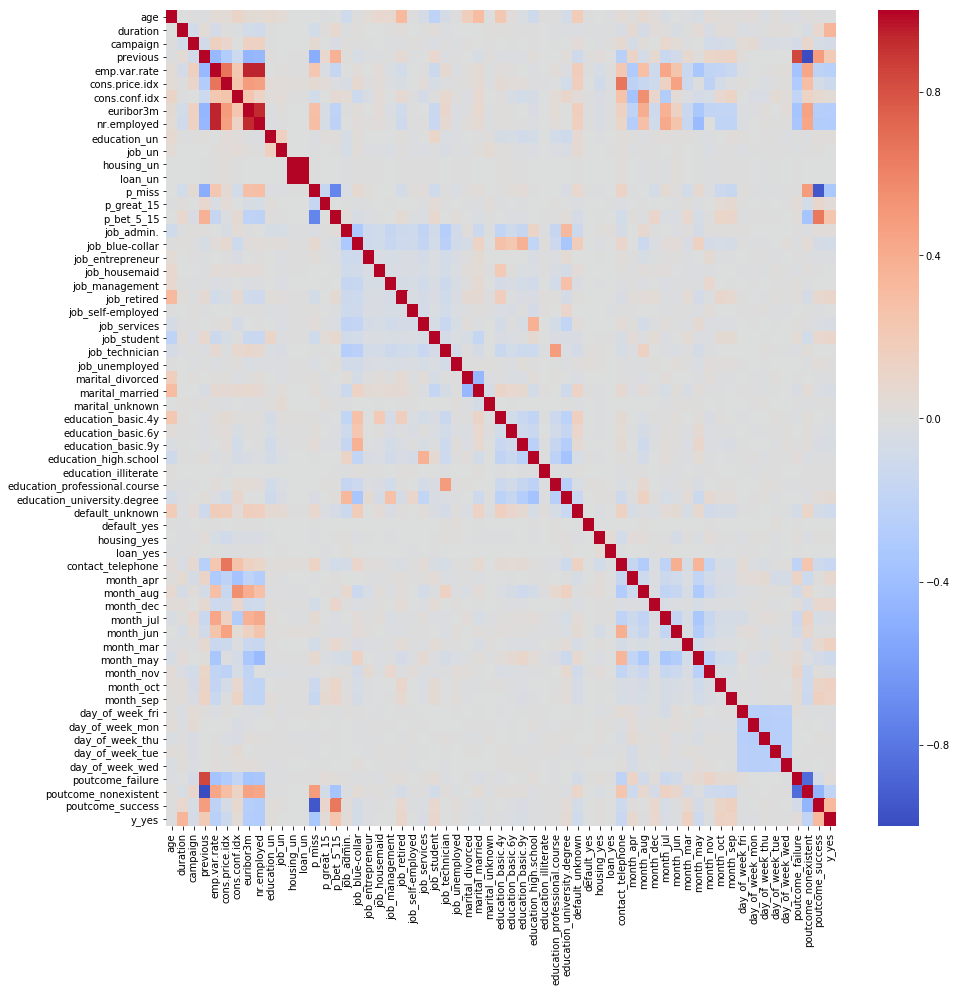

In [70]:
drawheatmap(df1)

We can see that 'y_yes' (the target variable) has good correlation with 
- 'previous', 
- 'emp.var.rate', 
- 'euribor3m',
- 'nr.employed',
- 'pdays_missing', 
- 'poutcome_success' , 
- 'poutcome_nonexistent'
- 'pdays_bet_5_15'. 

Looks like these independent variables are significant. 

In [75]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 61 columns):
age                              41188 non-null int64
duration                         41188 non-null int64
campaign                         41188 non-null int64
previous                         41188 non-null int64
emp.var.rate                     41188 non-null float64
cons.price.idx                   41188 non-null float64
cons.conf.idx                    41188 non-null float64
euribor3m                        41188 non-null float64
nr.employed                      41188 non-null float64
education_un                     41188 non-null int64
job_un                           41188 non-null int64
housing_un                       41188 non-null int64
loan_un                          41188 non-null int64
p_miss                           41188 non-null int64
p_great_15                       41188 non-null int64
p_bet_5_15                       41188 non-null int64
job_admin.       

## Model Building and Evaluation
In general, algorithms that exploit distances or similarities (e.g. in form of scalar product) between data samples, such as k-NN and SVM, are sensitive to feature transformations. Though graphical-model based classifiers, such as Fisher LDA or Naive Bayes, Decision trees and Tree-based ensemble methods (RF, XGB) are invariant to feature scaling, but still it might be a good idea to rescale/standartise the data.


In [0]:
# Using the data frame where we had created dummy variables
y = df1['y_yes'].values
X = df1.drop(columns = ['y_yes'])

In [79]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 60 columns):
age                              41188 non-null int64
duration                         41188 non-null int64
campaign                         41188 non-null int64
previous                         41188 non-null int64
emp.var.rate                     41188 non-null float64
cons.price.idx                   41188 non-null float64
cons.conf.idx                    41188 non-null float64
euribor3m                        41188 non-null float64
nr.employed                      41188 non-null float64
education_un                     41188 non-null int64
job_un                           41188 non-null int64
housing_un                       41188 non-null int64
loan_un                          41188 non-null int64
p_miss                           41188 non-null int64
p_great_15                       41188 non-null int64
p_bet_5_15                       41188 non-null int64
job_admin.       

In [82]:
y

array([0, 0, 0, ..., 0, 1, 0], dtype=uint8)

In [83]:
# Rescale data (between 0 and 1)
import pandas
import scipy
import numpy
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
# summarise transformed data
numpy.set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[0.481 0.053 0.    0.    0.938 0.699 0.603 0.957 0.86  0.    0.    0.
  0.    1.    0.    0.    0.    0.    0.    1.    0.    0.    0.    0.
  0.    0.    0.    0.    1.    0.    1.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    1.    0.    0.    0.    0.    0.    0.
  1.    0.    0.    0.    0.    1.    0.    0.    0.    0.    1.    0.   ]
 [0.494 0.03  0.    0.    0.938 0.699 0.603 0.957 0.86  0.    0.    0.
  0.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    1.
  0.    0.    0.    0.    1.    0.    0.    0.    0.    1.    0.    0.
  0.    1.    0.    0.    0.    1.    0.    0.    0.    0.    0.    0.
  1.    0.    0.    0.    0.    1.    0.    0.    0.    0.    1.    0.   ]
 [0.247 0.046 0.    0.    0.938 0.699 0.603 0.957 0.86  0.    0.    0.
  0.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    1.
  0.    0.    0.    0.    1.    0.    0.    0.    0.    1.    0.    0.
  0.    0.    0.    1.    0.    1.    0.    0.    0.    0.    0.    0

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# split data into train and test sets
seed = 123
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)


A number of ML algorithm can be ussed for model developement. I will do an algorithm comparison to check which classifier prduces best score on training data.
### Avoiding Overfitting
An error in the modeling algorithm that takes into consideration random noise in the fitting process rather than the pattern itself. This occurs when the model gets an excellent score in the training set but poor score on test data. This is likely to happen because of overfitting of the data (taking into consideration random noise in the pattern). The model should take the overall pattern of the data in order to correctly classify whether a potential client will suscribe to a term deposit or not. To avoid overfitting I have used cross validation. This algorithm will iterate through all the training and test sets and the main purpose of this is to grab the overall pattern of the data.

 LR : 0.910528 (0.003994)
 GBC : 0.916144 (0.002980)
 KNN : 0.902084 (0.003413)
 DT : 0.889726 (0.005068)
 NB : 0.871716 (0.004601)
 SVM : 0.889183 (0.006594)
 RF : 0.911180 (0.003071)
 MLP : 0.850045 (0.056082)
 XGB : 0.916652 (0.004189)


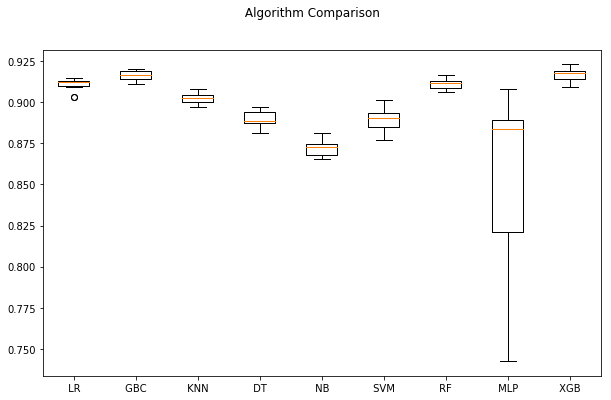

In [91]:
import time

from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# prepare models
models = []
models.append(( ' LR ' , LogisticRegression(solver='lbfgs', max_iter=5000)))
models.append(( ' GBC ' , GradientBoostingClassifier()))
models.append(( ' KNN ' , KNeighborsClassifier()))
models.append(( ' DT ' , DecisionTreeClassifier()))
models.append(( ' NB ' , GaussianNB()))
models.append(( ' SVM ' , SVC(gamma='scale')))
models.append(( ' RF ' , RandomForestClassifier(n_estimators=60)))
models.append(( ' MLP ' , MLPClassifier(alpha=1)))
models.append(( ' XGB ' , XGBClassifier()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle( ' Algorithm Comparison ' )
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

Apart from mean accuracy and standard deviation accuracy score, the box and whisker plot shows the spread of the accuracy scores across each cross validation fold for each algorithm. From these results, it would suggest that XGB is worthy of further study on this dataset.

In [144]:
from sklearn.metrics import accuracy_score
# fit model no training data
XGB = XGBClassifier(cv=10)
XGB.fit(X_train, y_train)
# make predictions for test data
y_pred = XGB.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 91.50%


In [145]:
from sklearn.metrics import classification_report,confusion_matrix
y_true=sorted(y_test)
y_score=sorted(predictions)
print(confusion_matrix(y_true,y_score))
print(classification_report(y_true,y_score))

[[12059     0]
 [  262  1272]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12059
           1       1.00      0.83      0.91      1534

    accuracy                           0.98     13593
   macro avg       0.99      0.91      0.95     13593
weighted avg       0.98      0.98      0.98     13593



In [146]:
from sklearn.metrics import roc_auc_score
print('XGB Classifier Score: ', roc_auc_score(y_true, y_score))

XGB Classifier Score:  0.9146023468057367


Text(0.6, 0.3, 'Minimum ROC Score of 50% \n (This is the minimum score to get)')

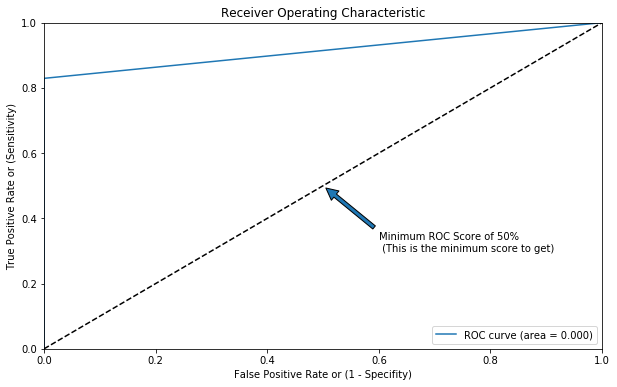

In [139]:
#ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_true, y_score)
roc_auc = auc(y_true, y_score)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', 
                 xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(shrink=0.05),
                )

In [147]:
RF = RandomForestClassifier(n_estimators=60)
RF.fit(X_train, y_train)
# make predictions for test data
y_pred = RF.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 90.87%


Feature ranking:
1. feature 1 (0.282579)
2. feature 7 (0.103023)
3. feature 0 (0.083579)
4. feature 2 (0.041235)
5. feature 8 (0.040096)
6. feature 59 (0.025696)
7. feature 4 (0.024802)
8. feature 6 (0.021862)
9. feature 5 (0.021238)
10. feature 13 (0.021027)
11. feature 39 (0.020593)
12. feature 28 (0.015648)
13. feature 40 (0.012570)
14. feature 16 (0.012266)
15. feature 36 (0.012261)
16. feature 3 (0.012224)
17. feature 53 (0.011629)
18. feature 55 (0.011555)
19. feature 54 (0.011132)
20. feature 15 (0.010980)
21. feature 33 (0.010704)
22. feature 41 (0.010448)
23. feature 25 (0.010405)
24. feature 52 (0.010326)
25. feature 56 (0.010091)
26. feature 37 (0.008773)
27. feature 17 (0.008474)
28. feature 32 (0.008109)
29. feature 35 (0.008094)
30. feature 27 (0.008005)
31. feature 57 (0.007101)
32. feature 58 (0.006635)
33. feature 30 (0.006456)
34. feature 50 (0.006292)
35. feature 23 (0.006244)
36. feature 20 (0.006189)
37. feature 48 (0.005993)
38. feature 21 (0.005612)
39. feature 9

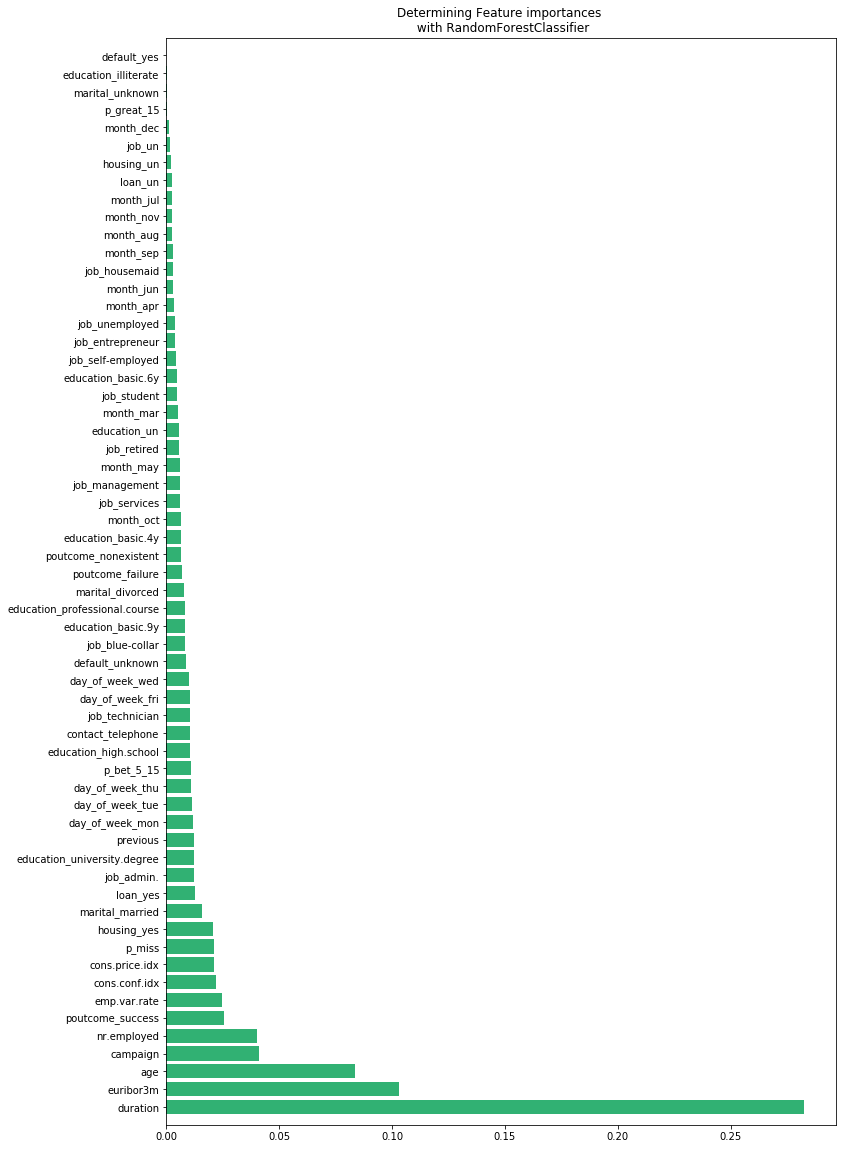

In [151]:
importances = RF.feature_importances_
feature_names = X_train.columns
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
def feature_importance_graph(indices, importances, feature_names):
    plt.figure(figsize=(12,20))
    plt.title("Determining Feature importances \n with RandomForestClassifier", fontsize=12)
    plt.barh(range(len(indices)), importances[indices], color='#31B173',  align="center")
    plt.yticks(range(len(indices)), feature_names[indices], rotation='horizontal',fontsize=10)
    plt.ylim([-1, len(indices)])
    #plt.axhline(y=1.85, xmin=0.21, xmax=0.952, color='k', linewidth=3, linestyle='--')
    #plt.text(0.30, 2.8, '46% Difference between \n duration and contacts', color='k', fontsize=15)
    
feature_importance_graph(indices, importances, feature_names)
plt.show()